In [2]:
from factor_analysis import *

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('default')
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False

### 一、医药生物行业整体分析

In [4]:
# 基础信息
indexname = '35'
date = '2023-08-01'                  # datetime.datetime.now().date().strftime('%F')

exchange_list = {'XSHE':'深交所','XSHG':'上交所'}
exchange_list['XSHE']

stock_list = get_industry(indexname, source='citics_2019', date=date)
industry_stocktable = get_instrument_industry(stock_list,
                                                source='citics_2019',
                                                level=0)[['third_industry_name']]
industry_stocktable.reset_index(inplace = True)
industry_stocktable['year'] = [instruments(i).listed_date[:4] for i in industry_stocktable.order_book_id]

print(set(industry_stocktable['third_industry_name']))

{'化学原料药', '动物疫苗及兽药', '中药饮片', '生物医药Ⅲ', '医药流通', '医疗服务', '物业经纪服务', '中成药', '化学制剂', '医疗器械'}


In [5]:
get_instrument_industry(stock_list,source='citics_2019',level=0)

,first_industry_code,first_industry_name,second_industry_code,second_industry_name,third_industry_code,third_industry_name
order_book_id,,,,,,
000028.XSHE,35,医药,3540,其他医药医疗,354010,医药流通
000078.XSHE,35,医药,3540,其他医药医疗,354010,医药流通
000153.XSHE,35,医药,3510,化学制药,351020,化学制剂
000403.XSHE,35,医药,3530,生物医药Ⅱ,353010,生物医药Ⅲ
000411.XSHE,35,医药,3540,其他医药医疗,354010,医药流通
...,...,...,...,...,...,...
688677.XSHG,35,医药,3540,其他医药医疗,354020,医疗器械
688687.XSHG,35,医药,3530,生物医药Ⅱ,353010,生物医药Ⅲ
688739.XSHG,35,医药,3530,生物医药Ⅱ,353010,生物医药Ⅲ


In [6]:
industry_stocktable

,order_book_id,third_industry_name,year
0,000028.XSHE,医药流通,1993
1,000078.XSHE,医药流通,1998
2,000153.XSHE,化学制剂,2000
3,000403.XSHE,生物医药Ⅲ,1996
4,000411.XSHE,医药流通,1996
...,...,...,...
465,688677.XSHG,医疗器械,2021
466,688687.XSHG,生物医药Ⅲ,2021
467,688739.XSHG,生物医药Ⅲ,2021
468,688767.XSHG,生物医药Ⅲ,2021


In [7]:
sw_industryid3 = industry_stocktable.third_industry_name.value_counts()
sw_industryid3

医疗器械       105
生物医药Ⅲ       81
化学制剂        78
中成药         69
化学原料药       58
医疗服务        43
医药流通        29
中药饮片         5
物业经纪服务       1
动物疫苗及兽药      1
Name: third_industry_name, dtype: int64

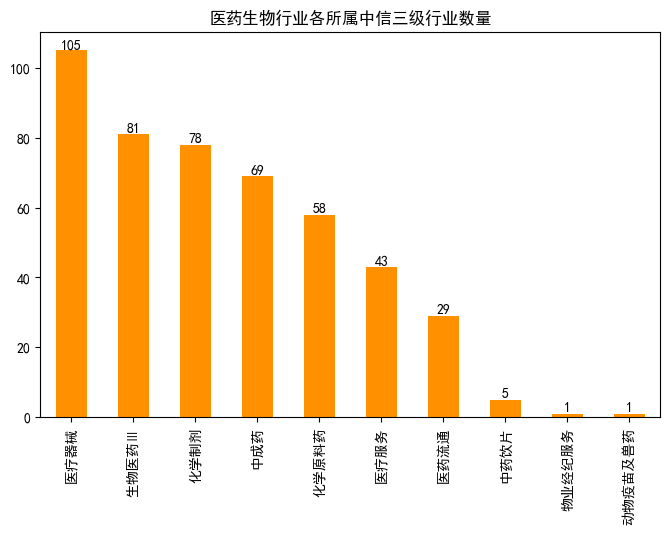

In [8]:
sw_industryid3.plot(kind='bar',figsize =(8,5),color='#ff9000')
plt.title('医药生物行业各所属中信三级行业数量')
# 显示数字
X = range(0,len(sw_industryid3))
Y = list(sw_industryid3)
for x,y in zip(X,Y):
     plt.text(x, y, '{}'.format(y), ha='center', va= 'bottom')

In [11]:
industry_stocktable = industry_stocktable[~industry_stocktable.third_industry_name.isin(['物业经纪服务','动物疫苗及兽药'])]             # 行业内标的太少 不予研究

In [12]:
industry_stocktable

,order_book_id,third_industry_name,year
0,000028.XSHE,医药流通,1993
1,000078.XSHE,医药流通,1998
2,000153.XSHE,化学制剂,2000
3,000403.XSHE,生物医药Ⅲ,1996
4,000411.XSHE,医药流通,1996
...,...,...,...
465,688677.XSHG,医疗器械,2021
466,688687.XSHG,生物医药Ⅲ,2021
467,688739.XSHG,生物医药Ⅲ,2021
468,688767.XSHG,生物医药Ⅲ,2021


In [13]:
tdf = industry_stocktable.groupby(['third_industry_name','year'])['order_book_id'].count().reset_index()
tdf = tdf.pivot(columns='third_industry_name',index ='year').fillna(0)
tdf

order_book_id                                        
third_industry_name           中成药 中药饮片  化学制剂 化学原料药  医疗器械  医疗服务 医药流通 生物医药Ⅲ
year                                                                     
1992                          1.0  0.0   0.0   0.0   0.0   2.0  0.0   0.0
1993                          2.0  0.0   2.0   0.0   0.0   1.0  1.0   2.0
1994                          0.0  0.0   5.0   0.0   0.0   0.0  2.0   1.0
1996                          4.0  0.0   2.0   1.0   0.0   2.0  2.0   2.0
1997                          3.0  0.0   3.0   3.0   1.0   0.0  2.0   2.0
1998                          1.0  0.0   1.0   0.0   0.0   0.0  2.0   1.0
1999                          2.0  0.0   3.0   3.0   0.0   0.0  1.0   2.0
2000                          5.0  0.0   2.0   1.0   0.0   0.0  1.0   0.0
2001                          4.0  1.0   1.0   1.0   1.0   0.0  0.0   1.0
2002                          3.0  0.0   0.0   0.0   2.0   0.0  1.0   0.0
2003                          1.0  0.0   1.0   1.0   0.0   0.0  0.0   0.0
2004                          5.0  0.0   1.0   3.0   0.0   0.0  0.0   4.0
2005                          0.0  0.0   0.0   0.0   0.0   1.0  0.0   0.0
2006                          1.0  0.0   0.0   2.0   0.0   0.0  0.0   0.0
2007                          2.0  0.0   0.0   0.0   0.0   2.0  0.0   1.0
2008                          1.0  0.0   1.0   0.0   1.0   0.0  0.0   1.0
2009                          4.0  0.0   3.0   0.0   2.0   1.0  0.0   1.0
2010                          9.0  0.0   8.0   4.0   3.0   1.0  2.0   3.0
2011                          6.0  0.0   2.0   3.0   5.0   0.0  0.0   6.0
2012                          0.0  0.0   3.0   2.0   3.0   1.0  0.0   2.0
2014                          1.0  1.0   7.0   1.0   3.0   0.0  2.0   1.0
2015                          3.0  0.0   4.0   3.0   4.0   2.0  2.0   3.0
2016                          4.0  0.0   3.0   3.0   3.0   0.0  2.0   1.0
2017                          3.0  3.0  10.0   5.0   9.0   3.0  2.0   7.0
2018                          0.0  0.0   1.0   1.0   4.0   1.0  0.0   1.0
2019                          0.0  0.0   2.0   2.0  11.0   2.0  0.0   1.0
2020                          2.0  0.0   8.0   3.0  14.0   3.0  2.0  12.0
2021                          1.0  0.0   2.0   6.0  17.0   8.0  4.0  17.0
2022                          1.0  0.0   3.0   7.0  18.0  12.0  0.0   6.0
2023                          0.0  0.0   0.0   3.0   4.0   1.0  1.0   3.0

Text(0.5, 1.0, '医药生物行业各年份各3级行业上市数量')

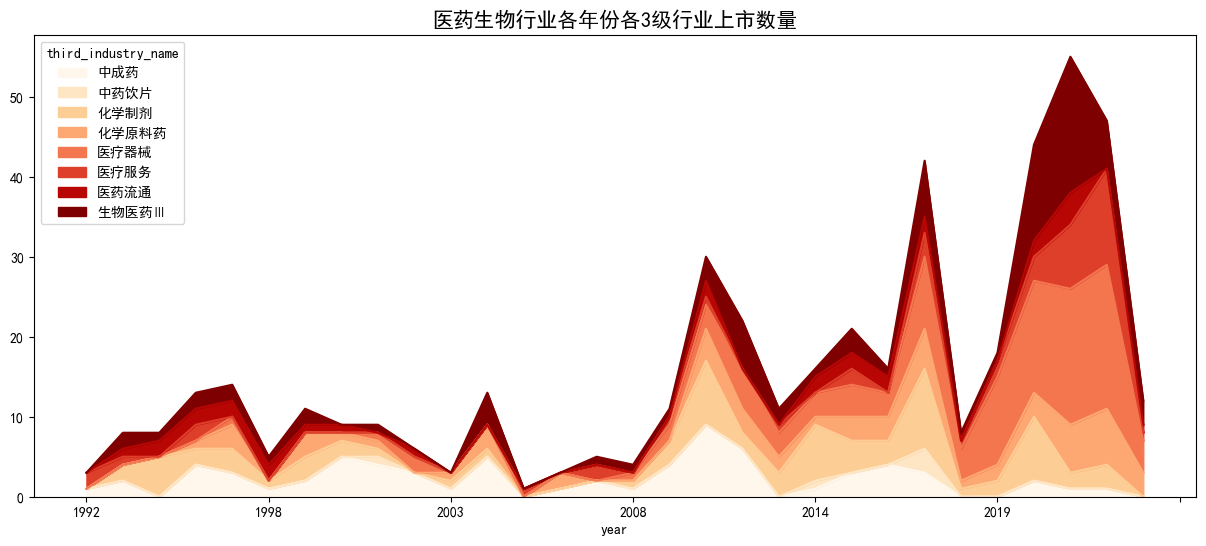

In [18]:
tdf['order_book_id'].plot(kind='area',figsize =(15,6),fontsize = 10,colormap='OrRd')
plt.title('医药生物行业各年份各3级行业上市数量',fontsize = 15)

#### 财务分析【获取2010年至今的财务数据】

In [19]:
finacedf = get_factor(industry_stocktable.order_book_id.tolist(),['pe_ratio','market_cap_3','return_on_equity_ttm','gross_profit_margin','revenue','net_profit'],start_date='2010-01-01',end_date='2022-02-01').dropna()

# 获取年末数据
year = []
trade_days = [i.strftime('%Y%m%d') for i in sorted(list(set(finacedf.index.get_level_values(1))))]
for i in range(1,len(trade_days)):
    if trade_days[i-1][:4] != trade_days[i][:4]:
        year.append(trade_days[i-1])
year = [pd.Timestamp(i)for i in year]     

finacedf = finacedf.reset_index()
finacedf = finacedf[finacedf.date.isin(year)]
finacedf.columns = ['股票代码','财务日期','PE','总市值','ROE','毛利率','总营收','净利润']
finacedf.describe()

,PE,总市值,ROE,毛利率,总营收,净利润
count,2743.000000,2.743000e+03,2743.000000,2743.000000,2.743000e+03,2.743000e+03
mean,56.442321,1.371491e+10,0.145024,46.919829,3.323938e+09,3.045574e+08
std,462.772737,2.944622e+10,2.418171,23.187794,8.663736e+09,6.014662e+08
min,-12396.438600,8.478720e+08,-6.811389,-112.444030,1.031852e+07,-2.371770e+09
25%,22.263800,3.657196e+09,0.048459,30.269822,4.901446e+08,4.180203e+07
50%,37.351500,6.665183e+09,0.098246,46.250934,1.060314e+09,1.206418e+08
75%,65.206750,1.361093e+10,0.154744,64.566372,2.703040e+09,3.173482e+08
max,11310.288500,5.942732e+11,124.535802,96.998443,1.609727e+11,8.403608e+09


In [20]:
indust_dict = get_instrument_industry(sorted(set(finacedf['股票代码'])),source='citics_2019',level=0)[['third_industry_name']].third_industry_name.to_dict()

finacedf['上市年份'] = finacedf['股票代码'].apply(lambda x : instruments(x).listed_date[:4])
finacedf['所属中信3级行业'] = finacedf['股票代码'].apply(lambda x : indust_dict[x])

# 单位处理
finacedf['总市值'] /=10000000
finacedf['总营收'] /=10000000
finacedf['净利润'] /=10000000
finacedf = finacedf.round(2)
finacedf.head()

,股票代码,财务日期,PE,总市值,ROE,毛利率,总营收,净利润,上市年份,所属中信3级行业
241,002102.XSHE,2010-12-31,316.29,204.83,0.02,39.36,47.19,0.41,2006,化学原料药
485,002102.XSHE,2011-12-30,-31.49,250.06,-0.14,44.08,53.04,1.00,2006,化学原料药
728,002102.XSHE,2012-12-31,-8.39,164.93,-0.40,44.70,50.54,-6.81,2006,化学原料药
966,002102.XSHE,2013-12-31,19.94,200.13,0.16,15.18,117.08,1.22,2006,化学原料药
1211,002102.XSHE,2014-12-31,365.12,553.43,0.02,15.40,122.73,0.04,2006,化学原料药


In [21]:
alldf = finacedf.groupby('财务日期').sum()

alldf['PE'] = finacedf.groupby('财务日期')['PE'].median()
alldf['ROE'] = finacedf.groupby('财务日期')['ROE'].median()
alldf['毛利率'] = finacedf.groupby('财务日期')['毛利率'].median()
alldf['平均市值'] = finacedf.groupby('财务日期')['总市值'].mean().round(2)

alldf['营收增速'] = alldf['总营收'].pct_change()
alldf['利润增速'] = alldf['净利润'].pct_change()
alldf = alldf.fillna(0)
alldf.index = alldf.index.strftime('%Y-%m-%d')
alldf

,PE,总市值,ROE,毛利率,总营收,净利润,平均市值,营收增速,利润增速
财务日期,,,,,,,,,
2010-12-31,52.880,108301.55,0.11,37.550,22347.74,1960.25,833.09,0.000000,0.000000
2011-12-30,33.430,90754.11,0.11,38.455,29128.18,2601.71,567.21,0.303406,0.327234
2012-12-31,31.975,107737.86,0.09,39.770,37570.18,2834.41,598.54,0.289822,0.089441
2013-12-31,42.310,157466.21,0.09,40.390,44265.57,3356.86,833.15,0.178210,0.184324
2014-12-31,44.935,189110.03,0.10,42.270,50223.76,3845.83,984.95,0.134601,0.145663
2015-12-31,63.350,324632.99,0.10,43.585,58181.98,4779.61,1545.87,0.158455,0.242803
2016-12-30,49.805,315952.70,0.10,44.185,68054.11,6013.21,1385.76,0.169677,0.258096
2017-12-29,41.840,352898.64,0.10,46.930,85690.38,8369.56,1428.74,0.259151,0.391862
2018-12-28,26.100,289675.91,0.10,50.210,107462.33,9655.47,1012.85,0.254077,0.153641


##### **行业各个指标趋势**

Text(0.5, 1.0, '申万医药生物行业总营收与净利润（2010-2021）')

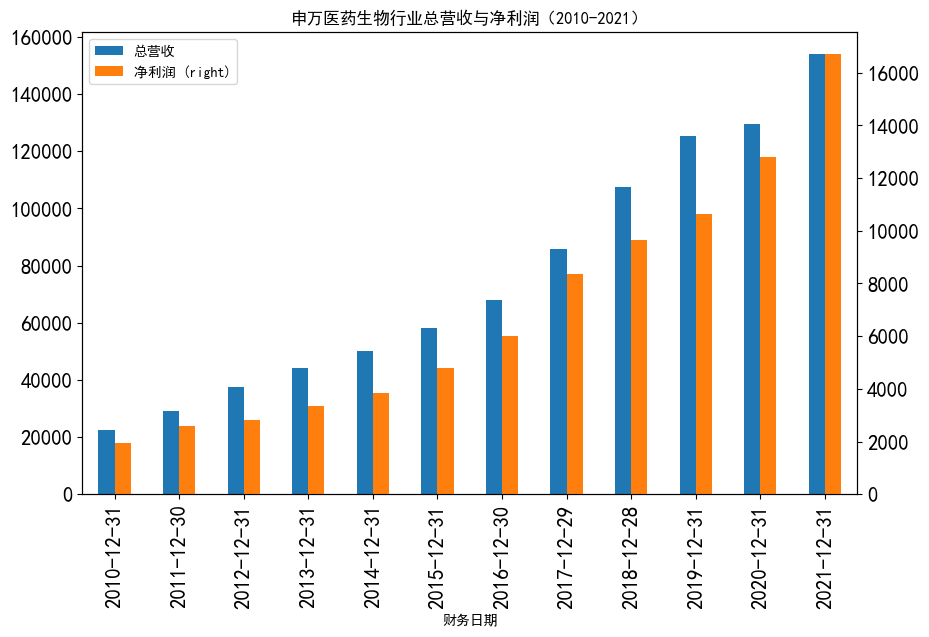

In [22]:
alldf[['总营收','净利润']].plot(kind = 'bar',secondary_y='净利润',figsize =(10,6),fontsize = 15)
plt.title('申万医药生物行业总营收与净利润（2010-2021）')

Text(0.5, 1.0, '申万医药生物行业营收与利润增速（2010-2021）')

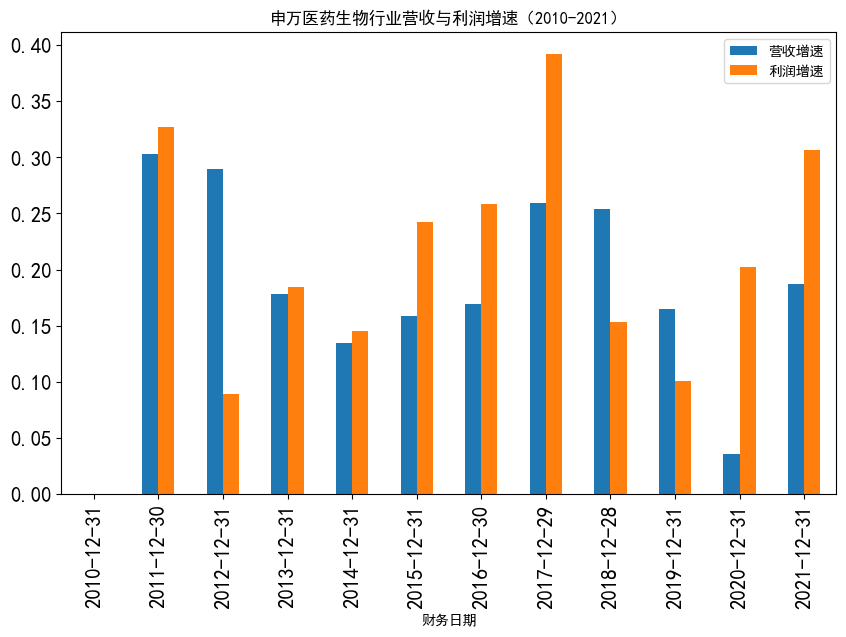

In [23]:
alldf[['营收增速','利润增速']].plot(kind = 'bar',figsize =(10,6),fontsize = 15)
plt.title('申万医药生物行业营收与利润增速（2010-2021）')

Text(0.5, 1.0, '申万医药生物行业总市值与PE估值（2010-2022）')

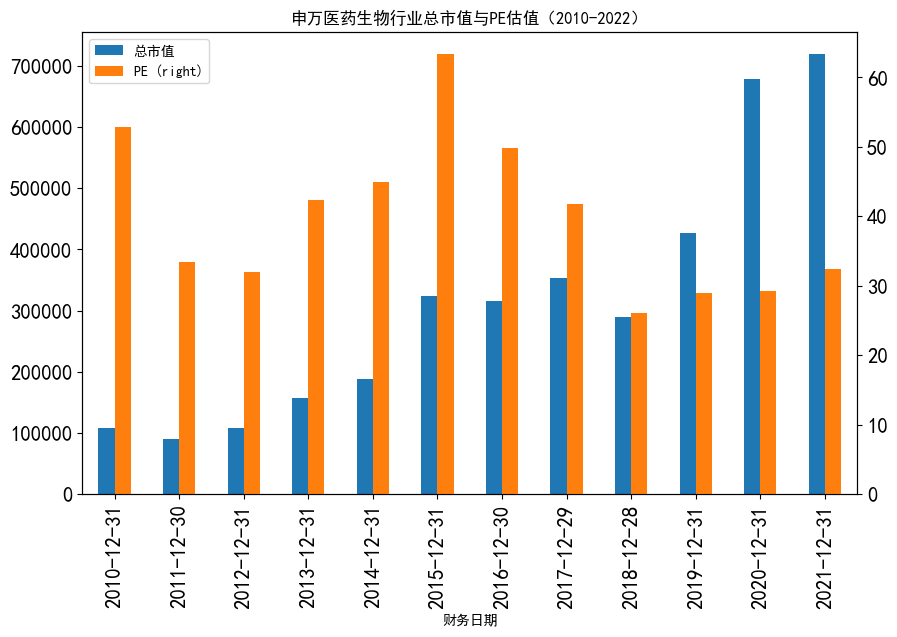

In [24]:
alldf[['总市值','PE']].plot(kind = 'bar',secondary_y='PE',figsize =(10,6),fontsize = 15)
plt.title('申万医药生物行业总市值与PE估值（2010-2022）')

Text(0.5, 1.0, '申万医药生物行业ROE与毛利率（2010-2022）')

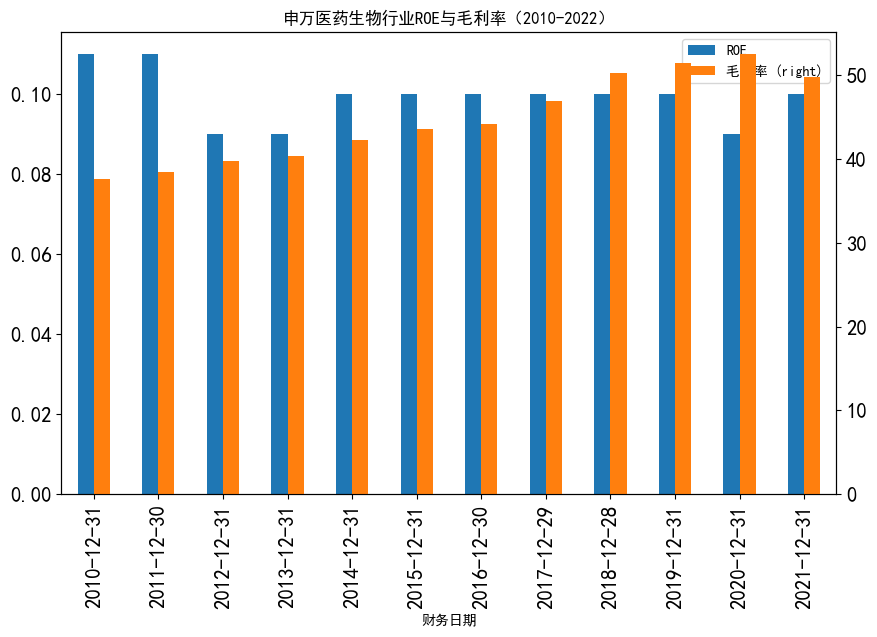

In [25]:
alldf[['ROE','毛利率']].plot(kind = 'bar',secondary_y='毛利率',figsize =(10,6),fontsize = 15)
plt.title('申万医药生物行业ROE与毛利率（2010-2022）')

##### **细分行业整体数据表**

In [26]:
alldf = finacedf.groupby(['所属中信3级行业','财务日期']).sum()
alldf['PE'] = finacedf.groupby(['所属中信3级行业','财务日期'])['PE'].median()
alldf['ROE'] = finacedf.groupby(['所属中信3级行业','财务日期'])['ROE'].median()
alldf['毛利率'] = finacedf.groupby(['所属中信3级行业','财务日期'])['毛利率'].median()
alldf['平均市值'] = finacedf.groupby(['所属中信3级行业','财务日期'])['总市值'].mean().round(2)

alldf = alldf.reset_index()
alldf['财务日期'] = alldf['财务日期'].apply(lambda x :x.strftime('%Y-%m-%d'))
alldf.head()

,所属中信3级行业,财务日期,PE,总市值,ROE,毛利率,总营收,净利润,平均市值
0,中成药,2010-12-31,51.735,36359.92,0.115,52.100,5407.46,567.69,865.71
1,中成药,2011-12-30,34.990,30272.79,0.110,50.340,6818.46,750.50,617.81
2,中成药,2012-12-31,33.400,37623.64,0.110,49.645,8767.01,922.61,696.73
3,中成药,2013-12-31,38.200,53765.57,0.110,49.210,11105.05,1198.80,995.66
4,中成药,2014-12-31,37.665,58396.78,0.115,52.135,12587.72,1424.56,1081.42


In [27]:
tdf = alldf.pivot(columns = '所属中信3级行业',index = '财务日期')
tdf.head()

PE                                                        \
所属中信3级行业       中成药   中药饮片    化学制剂   化学原料药   医疗器械    医疗服务    医药流通   生物医药Ⅲ   
财务日期                                                                       
2010-12-31  51.735  51.21  47.760  51.425  58.37  83.150  43.080  65.770   
2011-12-30  34.990  27.88  32.650  30.000  39.12  55.705  30.650  36.690   
2012-12-31  33.400  21.08  32.155  25.345  36.24  38.185  24.690  34.780   
2013-12-31  38.200  21.72  37.460  42.190  65.75  52.390  38.105  45.570   
2014-12-31  37.665  17.36  44.030  51.900  61.12  40.850  44.885  49.055   

                 总市值           ...     净利润             平均市值                    \
所属中信3级行业         中成药     中药饮片  ...    医药流通   生物医药Ⅲ      中成药     中药饮片     化学制剂   
财务日期                           ...                                              
2010-12-31  36359.92  3339.60  ...  165.04  162.48   865.71  3339.60  1140.62   
2011-12-30  30272.79  2466.96  ...  196.25  265.34   617.81  2466.96   689.13   
2012-12-31  37623.64  2889.11  ...  223.16  267.31   696.73  2889.11   781.89   
2013-12-31  53765.57  3957.69  ...  231.40  319.38   995.66  3957.69  1018.96   
2014-12-31  58396.78  3456.38  ...  280.82  349.65  1081.42  3456.38  1166.66   

                                                     
所属中信3级行业     化学原料药    医疗器械    医疗服务     医药流通   生物医药Ⅲ  
财务日期                                                 
2010-12-31  647.47  727.65  491.27   634.20  700.10  
2011-12-30  523.46  424.75  352.13   420.88  485.93  
2012-12-31  436.85  329.59  331.74   570.00  477.61  
2013-12-31  536.29  578.97  556.22   732.19  736.59  
2014-12-31  748.32  657.48  777.14  1041.47  953.16  

[5 rows x 56 columns]

Text(0.5, 1.0, '申万医药生物细分行业总营收（2010-2021）')

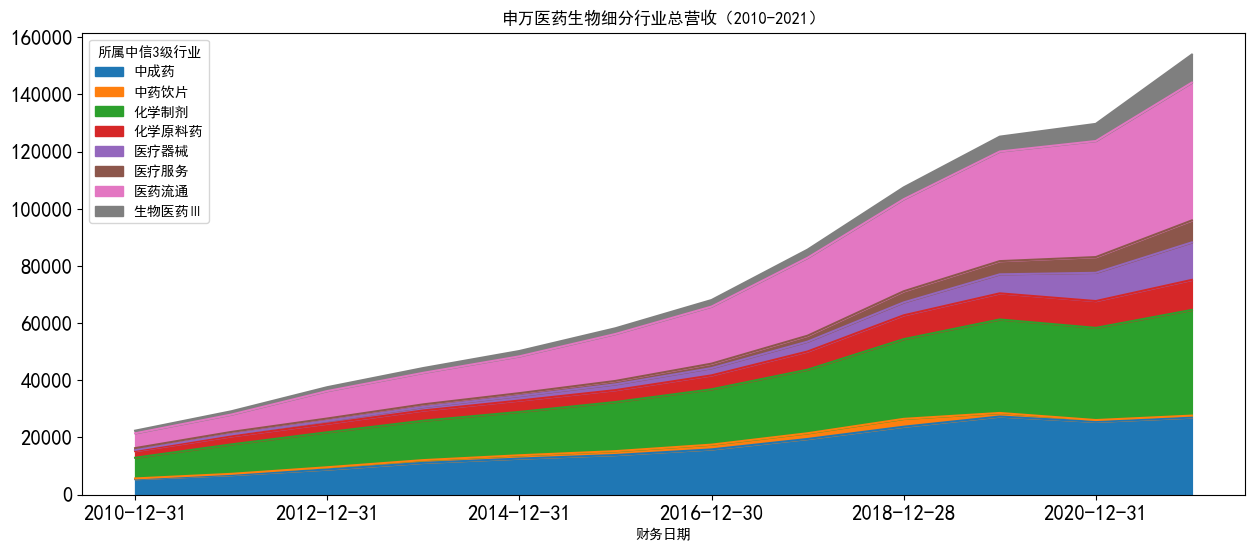

In [28]:
tdf['总营收'].plot(kind='area',figsize =(15,6),fontsize = 15)
plt.title('申万医药生物细分行业总营收（2010-2021）')

Text(0.5, 1.0, '申万医药生物细分行业营收增速（2010-2021）')

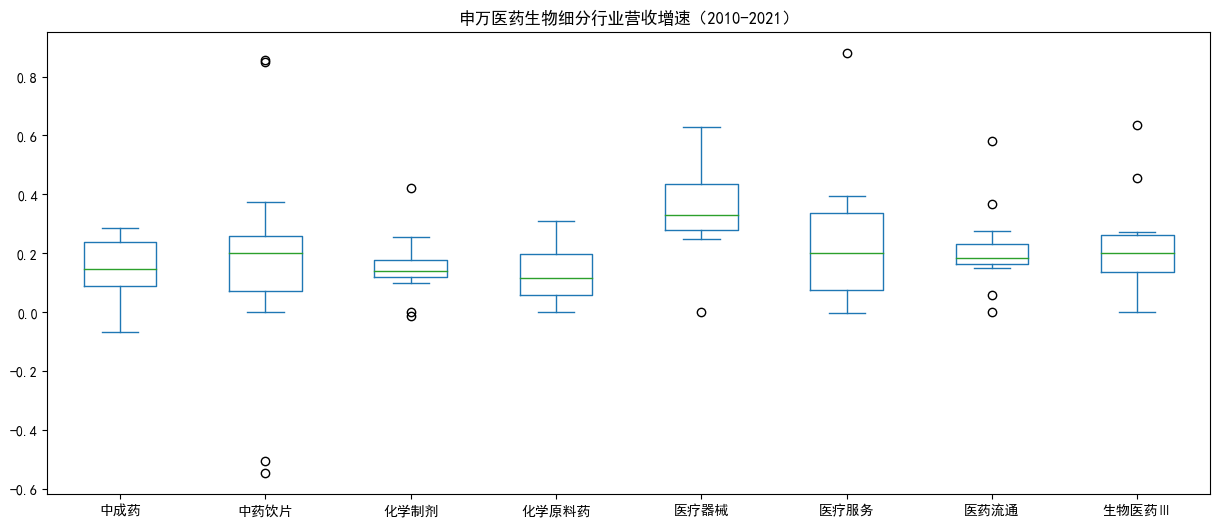

In [29]:
tdf['总营收'].pct_change().fillna(0).plot(kind='box',figsize =(15,6),fontsize = 10)
plt.title('申万医药生物细分行业营收增速（2010-2021）')

In [30]:
tdf['净利润']

所属中信3级行业,中成药,中药饮片,化学制剂,化学原料药,医疗器械,医疗服务,医药流通,生物医药Ⅲ
财务日期,,,,,,,,
2010-12-31,567.69,47.15,647.81,259.31,72.50,38.27,165.04,162.48
2011-12-30,750.50,64.07,890.43,318.11,121.01,-4.00,196.25,265.34
2012-12-31,922.61,100.61,840.70,313.15,128.23,38.64,223.16,267.31
2013-12-31,1198.80,138.70,1010.68,257.75,147.25,52.90,231.40,319.38
2014-12-31,1424.56,149.79,1113.08,310.98,179.63,37.32,280.82,349.65
2015-12-31,1606.67,211.05,1399.45,304.49,255.93,59.43,441.46,501.13
2016-12-30,1938.38,259.01,1696.21,524.31,310.57,127.10,591.08,566.55
2017-12-29,2266.97,319.58,2741.68,627.17,448.48,188.29,998.24,779.15
2018-12-28,2618.42,417.31,2339.45,958.08,618.91,737.08,1155.25,810.97


Text(0.5, 1.0, '申万医药生物细分行业净利润（2010-2021）')

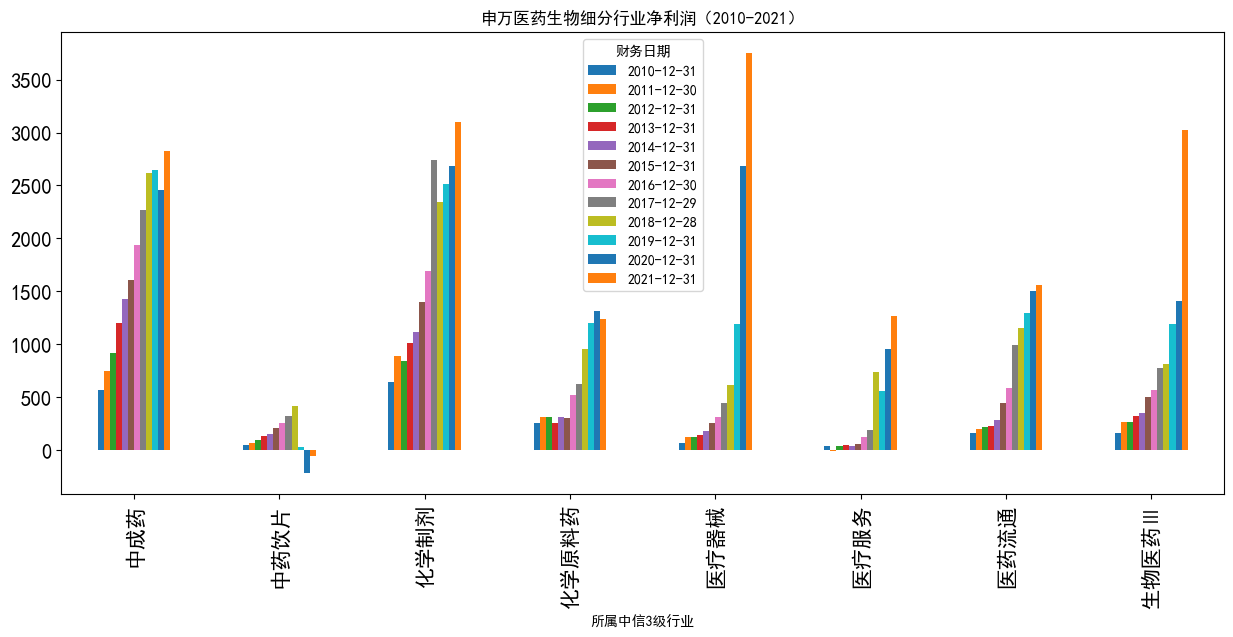

In [31]:
tdf['净利润'].T.plot(kind='bar',figsize =(15,6),fontsize = 15)
plt.title('申万医药生物细分行业净利润（2010-2021）')

Text(0.5, 1.0, '申万医药生物细分行业总市值（2010-2021）')

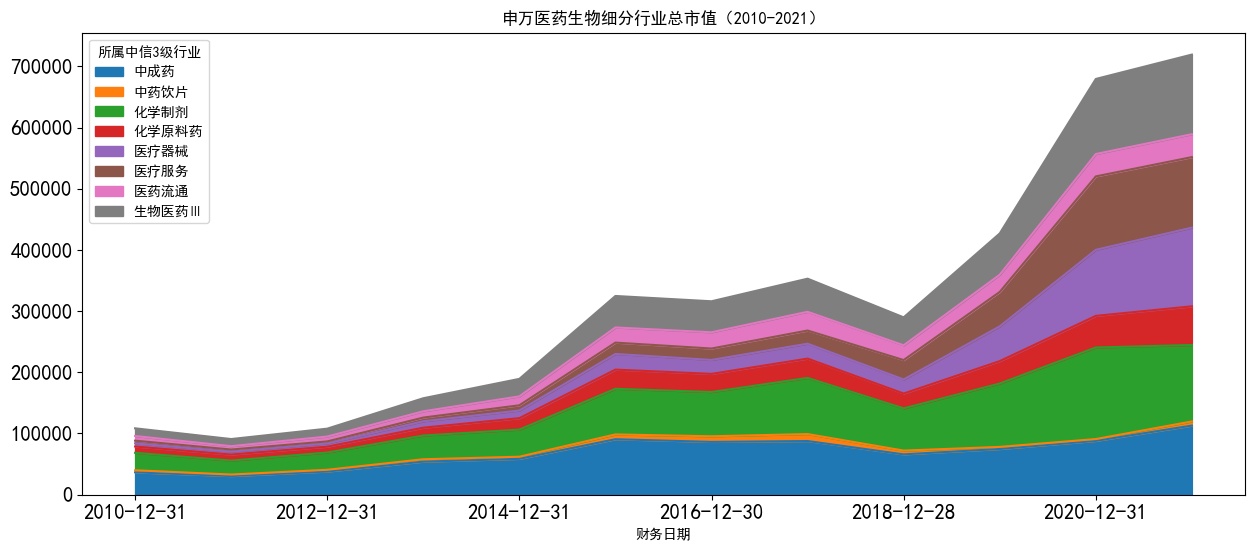

In [32]:
tdf['总市值'].plot(kind='area',figsize =(15,6),fontsize = 15)
plt.title('申万医药生物细分行业总市值（2010-2021）')

Text(0.5, 1.0, '申万医药生物细分行业ROE（2010-2021）')

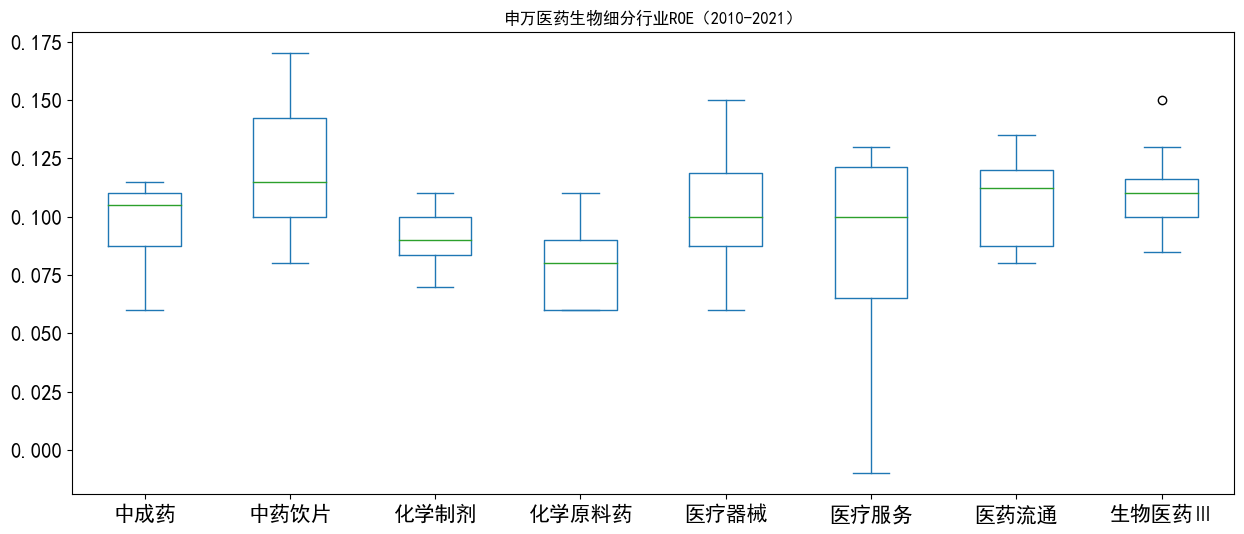

In [33]:
tdf['ROE'].plot(kind='box',figsize =(15,6),fontsize = 15)
plt.title('申万医药生物细分行业ROE（2010-2021）')

Text(0.5, 1.0, '申万医药生物细分行业毛利率（2010-2021）')

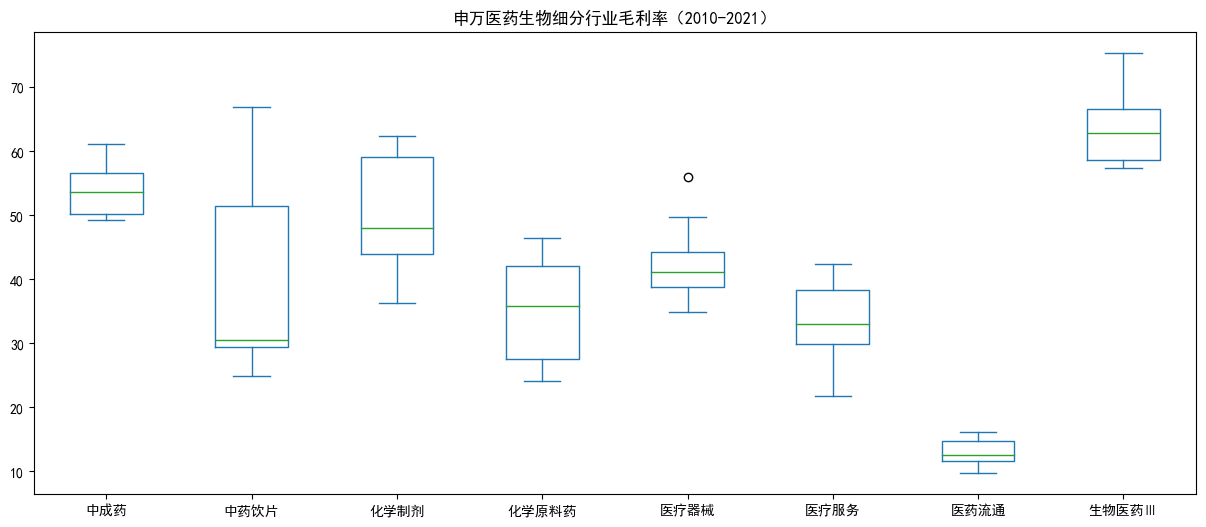

In [34]:
tdf['毛利率'].plot(kind='box',figsize =(15,6),fontsize = 10)
plt.title('申万医药生物细分行业毛利率（2010-2021）')

### 二、行业龙头股选股

#### 导入 第四节课：打分法模型 的等权合成因子数据

100%|██████████| 73/73 [00:00<00:00, 86.07it/s]


,回测指标
策略累计收益,0.4391
策略年化收益,0.0650
基准累计收益,-0.1667
基准年化收益,-0.0310
阿尔法,0.0850
贝塔,0.8542
波动率,0.2126
夏普比率,0.1645
下行波动率,0.1626
索提诺比率,0.2152


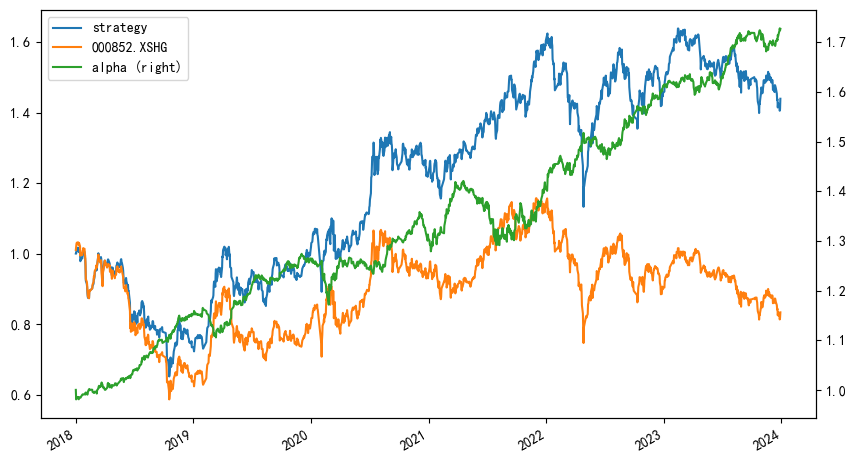

In [63]:
ew_combo = pd.read_pickle('./ew_combo.pkl')
index_item = '000852.XSHG'
df = ew_combo
buy_list = get_buy_list(df,rank_n = 200)
df_weight = buy_list.div(buy_list.sum(axis = 1),axis = 0)
df_weight = df_weight.shift(1).dropna(how = 'all')
account_result = backtest(df_weight)
performance_cumnet,result = get_performance_analysis(account_result,benchmark_index = index_item)

performance_cumnet.plot(secondary_y = 'alpha',figsize = (10,6))
pd.DataFrame([result],index = ['回测指标']).T

In [71]:
stock_list = ew_combo.columns.tolist()
date_list = ew_combo.index.tolist()
industry_exposure = get_industry_exposure(stock_list,date_list)

#### 按照一级行业分类(排名)

In [84]:
ew_combo_industry = ew_combo.stack().to_frame('factor')
ew_combo_industry['zx_industry'] = industry_exposure
ew_combo_industry = ew_combo_industry.reset_index()
ew_combo_industry['zx_industry_rank'] = ew_combo_industry.groupby(['datetime','zx_industry'])['factor'].rank(ascending = False)
ew_combo_industry = ew_combo_industry.set_index(['datetime','order_book_id'])

In [85]:
ew_combo_industry

factor zx_industry  zx_industry_rank
datetime   order_book_id                                        
2018-01-02 000010.XSHE   -0.971713          建筑              21.0
           000011.XSHE    1.975287         房地产              15.0
           000016.XSHE   -3.550662          家电              15.0
           000018.XSHE    3.471785         房地产               9.0
           000036.XSHE    0.634984         房地产              20.0
...                            ...         ...               ...
2023-12-29 688739.XSHG    3.093351          医药              23.0
           688776.XSHG   -4.364215        国防军工              26.0
           688789.XSHG    2.155441          机械              24.0
           688798.XSHG    3.568839          电子              16.0
           688800.XSHG   -0.693309          电子              58.0

[1409083 rows x 3 columns]

order_book_id,000055.XSHE,000151.XSHE,000416.XSHE,000571.XSHE,000601.XSHE,000666.XSHE,000796.XSHE,000819.XSHE,000899.XSHE,000920.XSHE,...,600138.XSHG,600861.XSHG,601326.XSHG,601811.XSHG,601969.XSHG,300113.XSHE,002405.XSHE,002390.XSHE,600601.XSHG,300772.XSHE
datetime,,,,,,,,,,,,,,,,,,,,,
2018-01-02,1.0,1.0,3.0,3.0,1.0,1.0,2.0,3.0,2.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-03,1.0,1.0,3.0,2.0,1.0,1.0,2.0,3.0,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-04,1.0,1.0,3.0,3.0,1.0,1.0,2.0,NaN,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-05,3.0,3.0,1.0,3.0,1.0,1.0,2.0,NaN,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-08,3.0,3.0,2.0,1.0,1.0,1.0,2.0,NaN,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,NaN,2.0,NaN,NaN,1.0,NaN,2.0,NaN,NaN
2023-12-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,NaN,2.0,NaN,NaN,2.0,NaN,NaN,3.0,NaN
2023-12-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,3.0,NaN,NaN,NaN,2.0,NaN,3.0,NaN,3.0


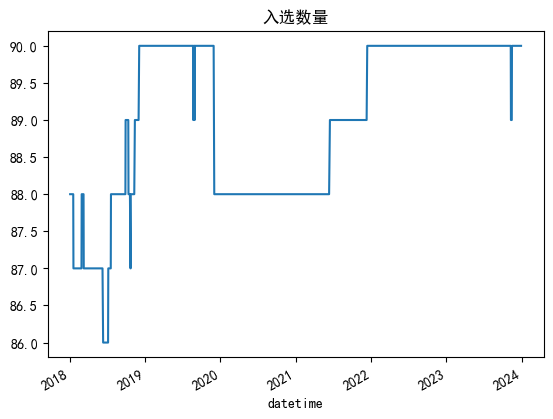

In [93]:
hold_stock = ew_combo_industry.zx_industry_rank[ew_combo_industry.zx_industry_rank <= 3]        # 入选前3
hold_stock = hold_stock.unstack('order_book_id')
hold_stock.count(axis = 1).plot(title = '入选数量')
hold_stock

100%|██████████| 73/73 [00:00<00:00, 139.95it/s]


,回测指标
策略累计收益,0.4071
策略年化收益,0.0609
基准累计收益,-0.1667
基准年化收益,-0.0310
阿尔法,0.0820
贝塔,0.8469
波动率,0.2175
夏普比率,0.1418
下行波动率,0.1683
索提诺比率,0.1833


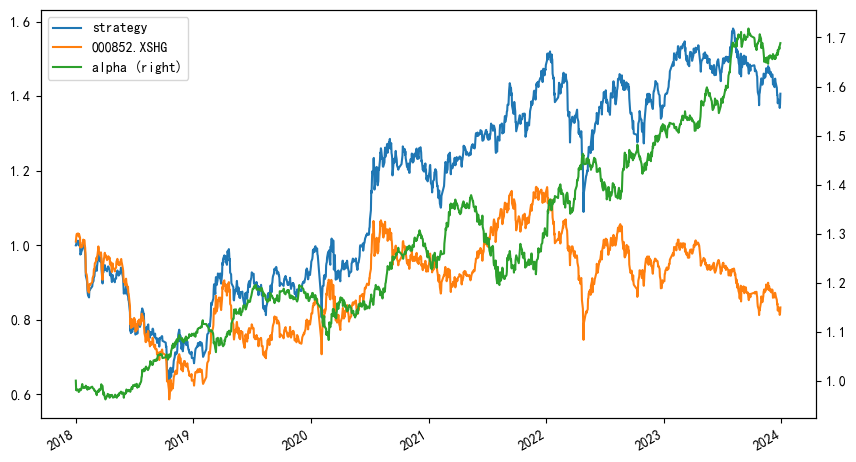

In [94]:
df_weight = hold_stock.div(hold_stock.sum(axis = 1),axis = 0)
df_weight = df_weight.shift(1).dropna(how = 'all')
account_result = backtest(df_weight)
performance_cumnet,result = get_performance_analysis(account_result,benchmark_index = index_item)

performance_cumnet.plot(secondary_y = 'alpha',figsize = (10,6))
pd.DataFrame([result],index = ['回测指标']).T

#### 按照二级行业分类(排名)

In [103]:
get_instrument_industry(stock_list, source='citics_2019', level=2, date=None, market='cn')

,second_industry_code,second_industry_name
order_book_id,,
000006.XSHE,4210,房地产开发和运营
000010.XSHE,2310,建筑施工
000011.XSHE,4210,房地产开发和运营
000012.XSHE,2440,结构材料
000016.XSHE,3320,黑色家电Ⅱ
...,...,...
688778.XSHG,2240,其他化学制品Ⅱ
688788.XSHG,2830,其他军工Ⅱ
688789.XSHG,2620,专用机械


In [108]:
industry_map = pd.DataFrame(index = date_list,columns = stock_list)

for i in tqdm(date_list[::20]):
    industry_map.loc[i] = get_instrument_industry(stock_list, source='citics_2019', level=2, date=i, market='cn').iloc[:,1]
industry_map = industry_map.ffill(limit = 19)

100%|██████████| 73/73 [00:13<00:00,  5.28it/s]


In [152]:
ew_combo_industry = ew_combo.stack().to_frame('factor')
ew_combo_industry['zx_industry_2'] = industry_map.stack()
ew_combo_industry = ew_combo_industry.reset_index()

# 计算二级行业内的排名
ew_combo_industry['zx_industry_2_rank'] = ew_combo_industry.groupby(['datetime','zx_industry_2'])['factor'].rank(ascending = False)
ew_combo_industry = ew_combo_industry.set_index(['datetime','order_book_id'])

# 筛选前2的股票
ew_combo_industry = ew_combo_industry[ew_combo_industry.zx_industry_2_rank <= 2]        # 入选前2
hold_stock = ew_combo_industry.zx_industry_2_rank.unstack('order_book_id')

<AxesSubplot: xlabel='zx_industry_2'>

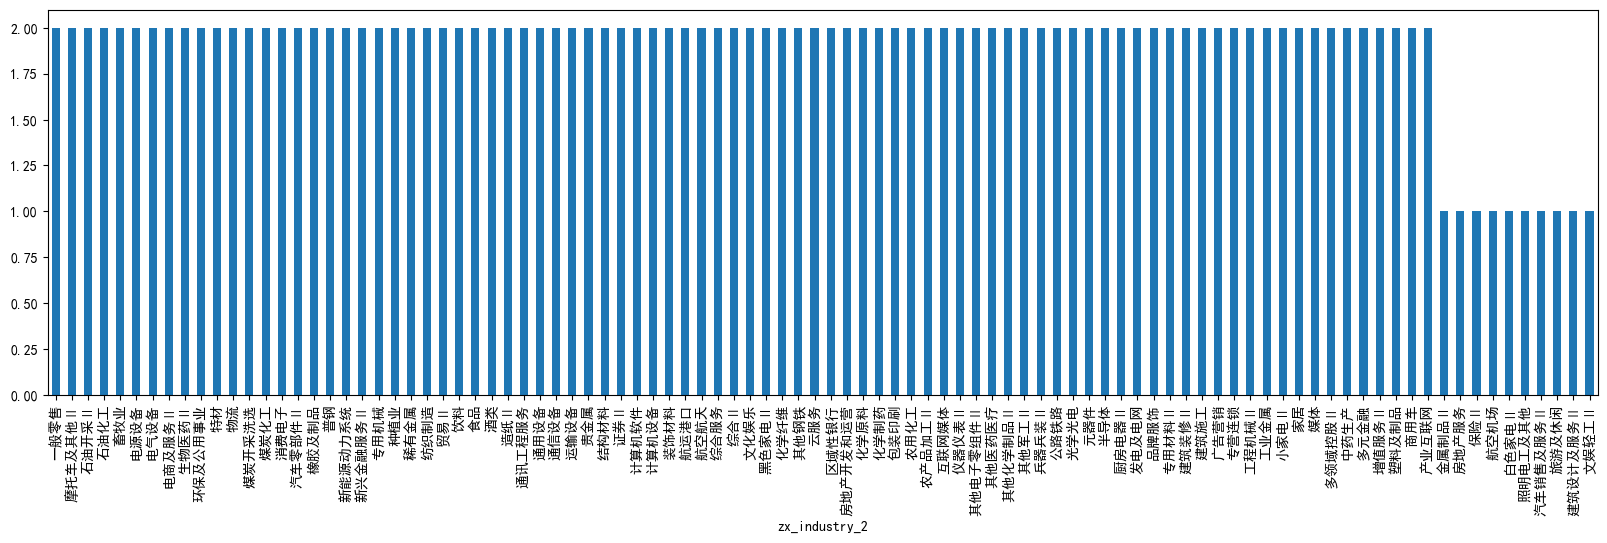

In [155]:
ew_combo_industry.loc['2023-12-29'].groupby(['zx_industry_2']).factor.count().sort_values(ascending = False).plot(kind = 'bar',figsize = (20,5))

100%|██████████| 73/73 [00:00<00:00, 95.06it/s]


,回测指标
策略累计收益,0.4080
策略年化收益,0.0610
基准累计收益,-0.1667
基准年化收益,-0.0310
阿尔法,0.0817
贝塔,0.8550
波动率,0.2145
夏普比率,0.1444
下行波动率,0.1656
索提诺比率,0.1871


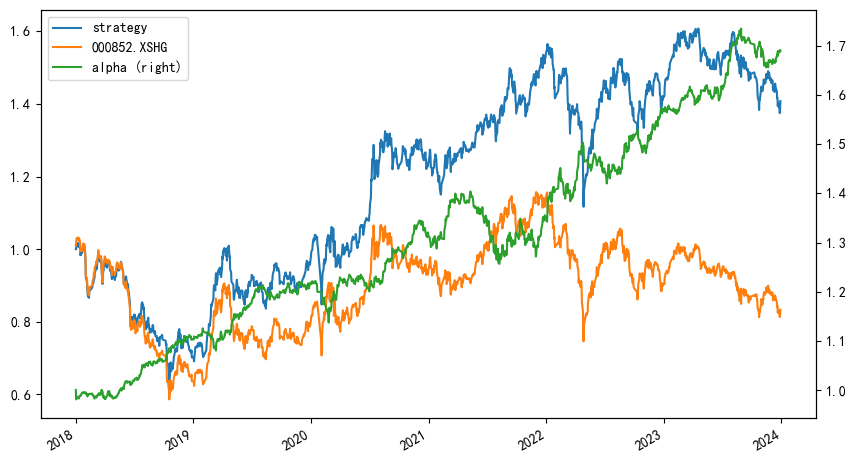

In [119]:
df_weight = hold_stock.div(hold_stock.sum(axis = 1),axis = 0)
df_weight = df_weight.shift(1).dropna(how = 'all')
account_result = backtest(df_weight)
performance_cumnet,result = get_performance_analysis(account_result,benchmark_index = index_item)

performance_cumnet.plot(secondary_y = 'alpha',figsize = (10,6))
pd.DataFrame([result],index = ['回测指标']).T

#### 按照二级行业分类(比例)

In [156]:
ew_combo_industry = ew_combo.stack().to_frame('factor')
ew_combo_industry['zx_industry_2'] = industry_map.stack()
ew_combo_industry = ew_combo_industry.reset_index()
# 计算二级行业的排名
ew_combo_industry['zx_industry_2_rank'] = ew_combo_industry.groupby(['datetime','zx_industry_2'])['factor'].rank(ascending = False)

# 计算二级行业内的股票数量
ew_combo_industry = ew_combo_industry.set_index(['datetime','zx_industry_2'])
ew_combo_industry['zx_industry_2_count'] = ew_combo_industry.groupby(['datetime','zx_industry_2'])['factor'].count() 

# 计算个股在二级行业中的分位数
ew_combo_industry = ew_combo_industry.reset_index().set_index(['datetime','order_book_id']).sort_index()
ew_combo_industry['zx_industry_2_ratio'] = ew_combo_industry['zx_industry_2_rank']/ew_combo_industry['zx_industry_2_count']

# 筛选分位数前20%的标的
ew_combo_industry = ew_combo_industry[ew_combo_industry.zx_industry_2_ratio < 0.2]
hold_stock = ew_combo_industry.zx_industry_2_ratio.unstack('order_book_id')

<AxesSubplot: xlabel='zx_industry_2'>

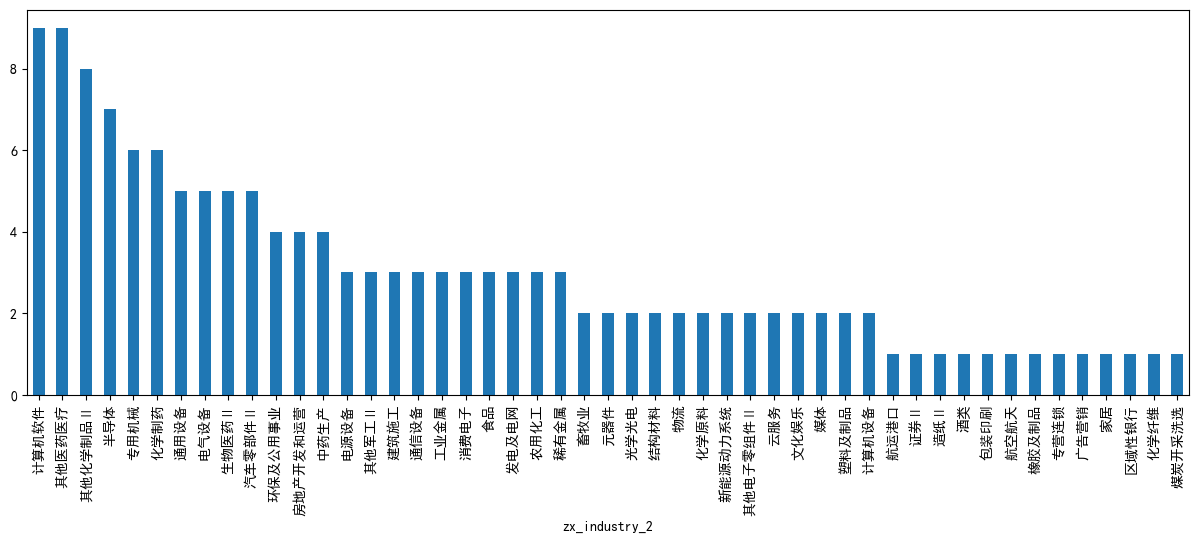

In [160]:
ew_combo_industry.loc['2023-12-29'].groupby(['zx_industry_2']).factor.count().sort_values(ascending = False).plot(kind = 'bar',figsize = (15,5))

100%|██████████| 73/73 [00:00<00:00, 114.87it/s]


,回测指标
策略累计收益,0.5237
策略年化收益,0.0756
基准累计收益,-0.1667
基准年化收益,-0.0310
阿尔法,0.1007
贝塔,0.9224
波动率,0.2281
夏普比率,0.1997
下行波动率,0.1723
索提诺比率,0.2644


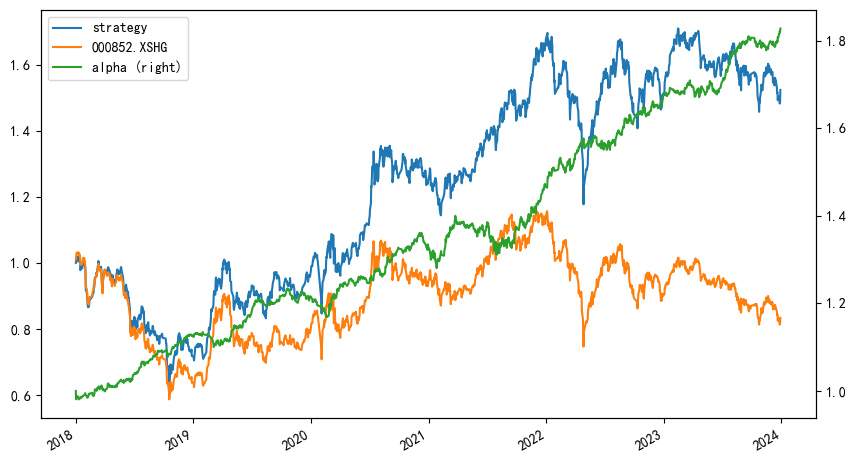

In [159]:
df_weight = hold_stock.div(hold_stock.sum(axis = 1),axis = 0)
df_weight = df_weight.shift(1).dropna(how = 'all')
account_result = backtest(df_weight)
performance_cumnet,result = get_performance_analysis(account_result,benchmark_index = index_item)

performance_cumnet.plot(secondary_y = 'alpha',figsize = (10,6))
pd.DataFrame([result],index = ['回测指标']).T

#### 二级行业内的股票数量

In [163]:
ew_combo_industry = ew_combo.stack().to_frame('factor')
ew_combo_industry['zx_industry_2'] = industry_map.stack()
ew_combo_industry = ew_combo_industry.loc['2023-12-29']

<AxesSubplot: xlabel='zx_industry_2'>

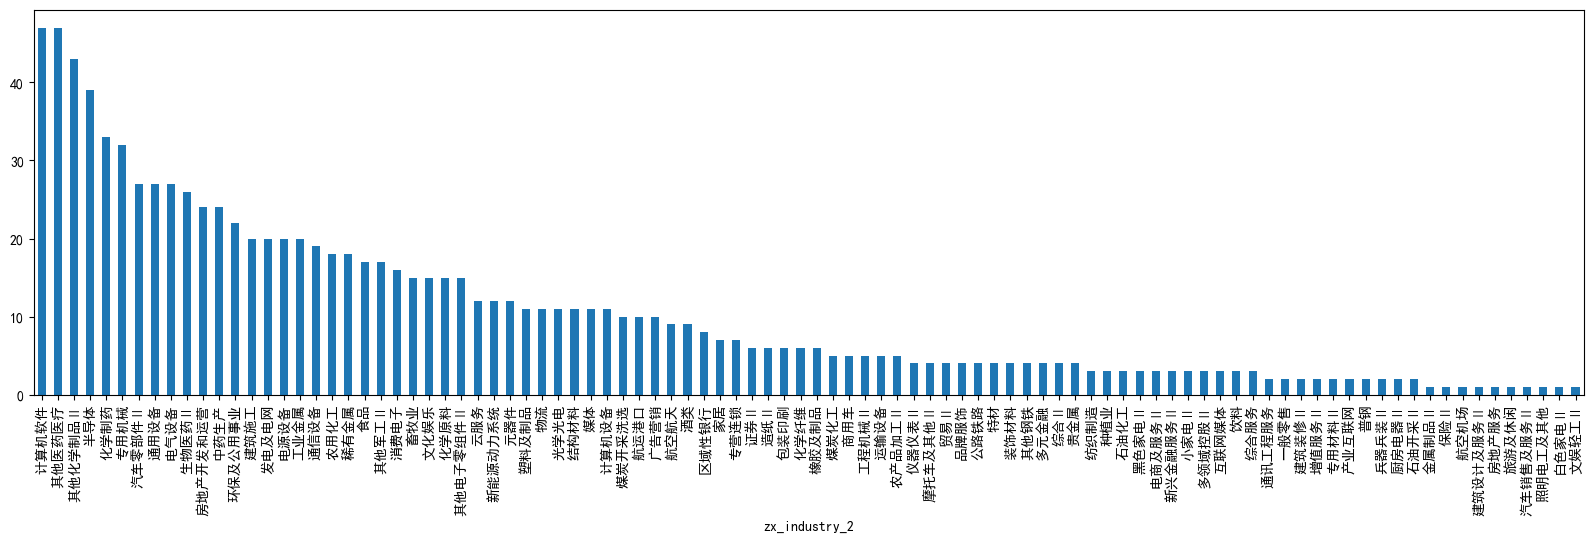

In [173]:
ew_combo_industry.groupby(['zx_industry_2']).factor.count().sort_values(ascending = False).plot(kind = 'bar',figsize = (20,5))